# Project: Investigate a Dataset (No_show appointements dataset)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from about 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

> 
> **Questions to be investigated in this analysis are:**
>
> 1- Which variables in the dataset are related to the non-showing up of patients in their appointments?
>
> 2- What recommendations could encourage patients to show up in their medical appointment?
>
> 3- Is it possible to predict if the patient would appear in his appointment?
>
> 4- Are the data collected are enough to achieve the main purpose of that study? what are the limitations of that dataset?
>


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('noshow.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### No missing data needs to be handeled

In [4]:
df.duplicated().sum()

0

### No duplicated rows need tobe removed


### Data Cleaning 

### Now we want to change the last column name to be more expressive

In [5]:
df.rename(columns =  {'No-show':'showing'},inplace = True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [6]:
df.showing.value_counts()

No     88208
Yes    22319
Name: showing, dtype: int64

## we want to switch 'Yes' and 'No' 

In [7]:
df['showing'] = df['showing'].replace(('No','Yes'),('yes','no'))

## Now let's check that switch succeeded

In [8]:
df['showing'].value_counts()

yes    88208
no     22319
Name: showing, dtype: int64

## Now let's remove unneccessary columns

In [9]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [10]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,yes


## We need to add a new  column to illustrate the difference between AppointmentDay and ScheduledDay

In [11]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
showing           object
dtype: object

## But it seemes that we can't carry out this, as 'ScheduledDay' & 'AppointmentDay dtypes' are objects, we need to convert them into datetime64

In [12]:
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)

In [13]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
showing                        object
dtype: object

## Now we will extract dates from 'AppointmentDay' & 'ScheduledDay' columns into  new columns

In [14]:
df['scheduled_date'] = df['ScheduledDay'].dt.date

In [15]:
df['appointment_date'] = df['AppointmentDay'].dt.date

In [16]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing,scheduled_date,appointment_date
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,2016-04-29,2016-04-29


## Now we are able to calculate difference between appointment date & scheduled date

In [17]:
df['waiting_time'] = df['appointment_date'] - df['scheduled_date']

In [18]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing,scheduled_date,appointment_date,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,2016-04-29,2016-04-29,0 days


In [19]:
df.waiting_time.dtypes

dtype('<m8[ns]')

In [20]:
df['waiting_time'] = df['waiting_time'].dt.days

In [21]:
df.waiting_time.dtypes

dtype('int64')

## Some columns now are not neccessary, we're going to drop them

In [22]:
df.drop(['ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [23]:
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing,scheduled_date,appointment_date,waiting_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,2016-04-29,2016-04-29,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,2016-04-29,2016-04-29,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,2016-04-29,2016-04-29,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,2016-04-29,2016-04-29,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,2016-04-29,2016-04-29,0


## Last step is to make all column names of lowercase characters

In [24]:
df.rename(columns = str.lower, inplace = True)

In [25]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showing,scheduled_date,appointment_date,waiting_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,2016-04-29,2016-04-29,0


<a id='eda'></a>
## Exploratory Data Analysis


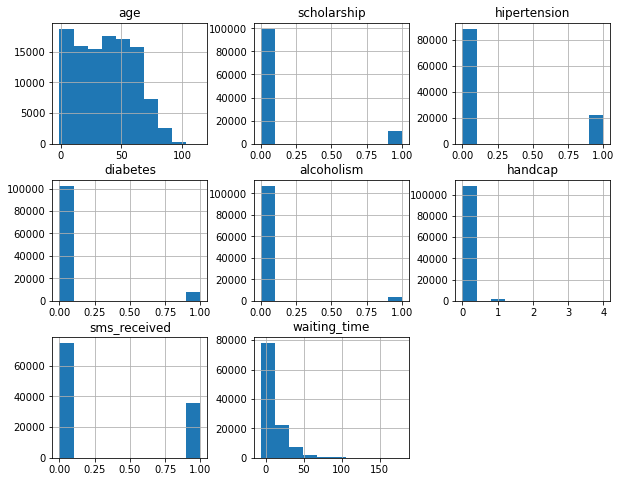

In [26]:
#Let's have a quick look at the dataset
df.hist(figsize = (10,8));

In [27]:
#creating mask for rows where patients showed up
show = df.showing == 'yes'

In [28]:
#creating mask for rows where patients didn't show up
noshow = df.showing == 'no'

In [29]:
#waiting_time indicates the difference between appointment day and sheduled day
df.waiting_time[show].mean()

8.754659441320515

In [30]:
df.waiting_time[noshow].mean()

15.83148886598862

### It is noticed that average waiting time is obviously higher in case of patients who didn't show up

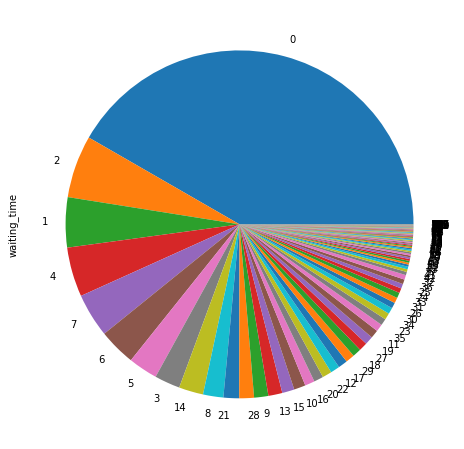

In [31]:
#investigate waiting_time in showing-up patients
df.query('showing == "yes"').waiting_time.value_counts().plot.pie(figsize = (8,8));



### This illustrates that the greatest percentage of patients who showed up in their appointments those who got appointments on the same day  that they call to set up their appointments

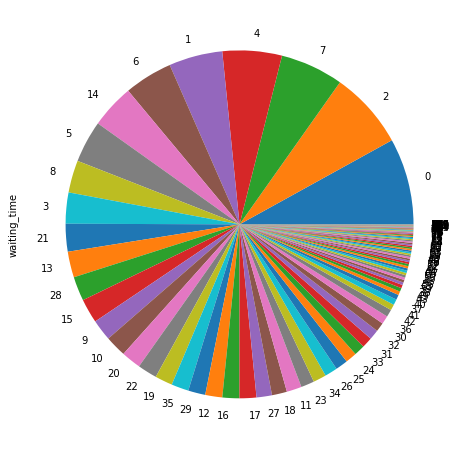

In [32]:
#investigating waiting time in case of patients who didn't show-up
df.query('showing == "no"').waiting_time.value_counts().plot.pie(figsize = (8,8));

### By comparing  two previous plots, we find out that patients who got appointments on the same day that they call to set up their appointments are more likely to show up in their appointments

In [33]:
df.age[show].mean()

37.790064393252315

In [34]:
df.age[noshow].mean()

34.31766656212196

### Average age of patients who showed up is greater than that average in patients who didn't show, but no remarkable difference.

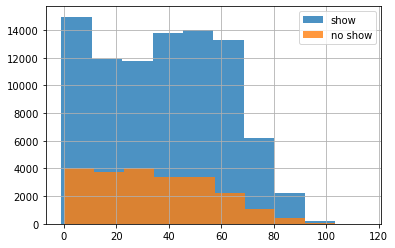

In [35]:
df.age[show].hist(alpha= 0.8, label= 'show')
df.age[noshow].hist(alpha = 0.8, label= 'no show')
plt.legend();

### It's obvious that propability of  children  to show up in their appointments is the highest.

### *******************************************************************************************************************************************************************************************************************************************************************

### Now Are patients with chronic diseases and alcoholism more committed to their appointments?

In [36]:
#Defining a function to be used multible times  to avoid repetitive code
def barchart(x1,x2, y1, y2,title,xlabel,ylabel):
    plt.bar([x1,x2],[y1,y2],color=['green','violet'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel); 


In [37]:
#alcoholism statistic in patients who showed up
df_alc_show = df.query('showing == "yes"').alcoholism.value_counts()

In [38]:
#alcoholism statistic in patients who didn't show up
df_alc_noshow = df.query('showing == "no"').alcoholism.value_counts()

None


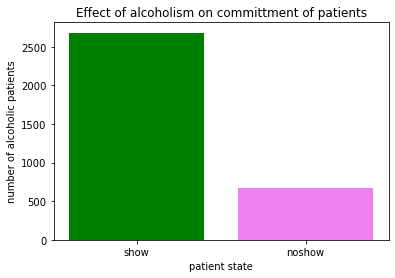

In [39]:
#comparison between alcoholic patients who showed up and who didn't
print(barchart('show','noshow',df_alc_show[1],df_alc_noshow[1],'Effect of alcoholism on committment of patients','patient state','number of alcoholic patients'))            

### It seems that alcoholic patients who showed-up are greater  than those who didn't, but this may be because total showing up patients are more, so let's further investigate that

In [40]:
no_of_total_showing = df.showing.value_counts()['yes']
no_of_total_showing

88208

In [41]:
no_of_total_unshowing = df.showing.value_counts()['no']
no_of_total_unshowing

22319

### because no of total showing-up patients are greater than those who didn't show-up, so we need to use ratios instead of value counts

None


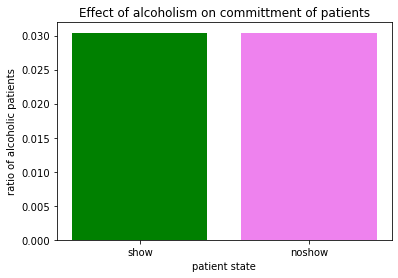

In [42]:
#comparison between alcoholic patients who showed up and who didn't depending on ratio
print(barchart('show','noshow',df_alc_show[1]/no_of_total_showing,df_alc_noshow[1]/no_of_total_unshowing,'Effect of alcoholism on committment of patients','patient state','ratio of alcoholic patients'))            

### Yes, It's obvious now that no remarkable difference between ratio of  alcoholic patients who showed-up and those who didn't 

In [43]:
df_show_diab = df.query('showing == "yes"').diabetes.value_counts()
df_noshow_diab = df.query('showing == "no"').diabetes.value_counts()

None


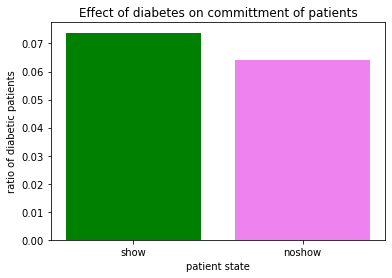

In [44]:
#comparison between diapetic patients who showed up and who didn't
print(barchart('show','noshow',df_show_diab[1]/no_of_total_showing,df_noshow_diab[1]/no_of_total_unshowing,'Effect of diabetes on committment of patients','patient state','ratio of diabetic patients'))            


### It seemes that diabetic patients are more likely to show in their appointments

In [45]:
df_show_hiper = df.query('showing == "yes"').hipertension.value_counts()
df_noshow_hiper = df.query('showing == "no"').hipertension.value_counts()

None


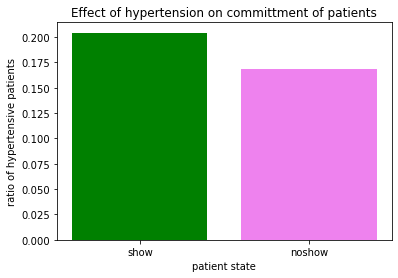

In [46]:
#comparison between hypertensive patients who showed up and who didn't
print(barchart('show','noshow',df_show_hiper[1]/no_of_total_showing,df_noshow_hiper[1]/no_of_total_unshowing,'Effect of hypertension on committment of patients','patient state','ratio of hypertensive patients'))            

### It seemes that  hypertensve patients are more likely to show up in their appointments.

### It's obvious now that people with chronic diseases  are the most likely to show in their medical appointments

In [47]:
df_show_sms = df.query('showing == "yes"').sms_received.value_counts()
df_noshow_sms = df.query('showing == "no"').sms_received.value_counts()

None


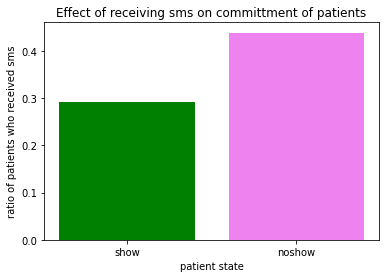

In [48]:
#comparison between showed up patients who  received sms and non showing up who received sms 
print(barchart('show','noshow',df_show_sms[1]/no_of_total_showing,df_noshow_sms[1]/no_of_total_unshowing,'Effect of receiving sms on committment of patients','patient state','ratio of patients who received sms'))            

### This plot shows that sending patients sms didn't help them to show up in their medical appointments

In [49]:
df_show_scholarship = df.query('showing == "yes"').scholarship.value_counts()
df_noshow_scholarship = df.query('showing == "no"').scholarship.value_counts()

None


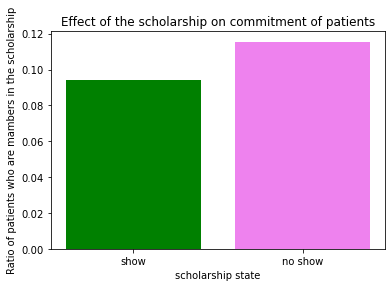

In [50]:
#comparison between members of scholarship who show and who didn't
print(barchart('show','no show',df_show_scholarship[1]/no_of_total_showing,df_noshow_scholarship[1]/no_of_total_unshowing,"Effect of the scholarship on commitment of patients",'scholarship state',"Ratio of patients who are mambers in the scholarship" ))            

### It seems that joining the Polsa Familia programe hasn't that strong impact in encouraging patients showing up in their appointments

<a id='conclusions'></a>
# Conclusions
>**Results:**
>
> 1- possible reasons of  patients not showing in the specific appointment are Scheduling very late appointment dates, they may forget it or even their complaign has gone.
>
> 2- Chronic disease patients are the most likely to come on their specific appointments.
>
> 3- Patients joining 'PolsaFamilia' aren't that interested in commitment in their appointments. also sending patients sms didn't have much impact
>
> 4- factors and recommendations that help patients show up in their medical appointment are; decreasing waiting time as possible
>
>**Limitations:**
>
> 1- Most of variables are boolean(i.e categorical), so doesn't help so much in high level of statistical methods that can be used to find correlations.
>
> 2- All statistics are descriptive not inferential, meaning that there is no controlled experiments.
>
> 3- Lack of some details like content of sms and time of sending. 
